In [ ]:
import numpy as np
from rules_new import RuleNew, make_rule_good, initial_population, print_rule
from fitness_new import FitnessCalculator, movement_score, proximity_score, find_distance_grid, get_population_fitness
from genetic_new import genetic_algorithm
import matplotlib.pyplot as plt
from utility_func import int_to_coord

In [ ]:
initial_pop = initial_population(100)
goal = (4, 4)

In [ ]:
distance_grid = find_distance_grid(*goal)
print(distance_grid)

In [ ]:
proximity_score = lambda distance: 1/distance
fitness_calculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

In [ ]:
fitness_list = get_population_fitness(initial_pop, fitness_calculator)
fitness_list = np.array(fitness_list)
print(np.sum(fitness_list))

In [ ]:
fitness_list = fitness_list - np.min(fitness_list)
new_population, new_fitness, sum_fitnesses = genetic_algorithm(distance_grid=distance_grid,
                                                population=initial_pop,
                                                fitness_calculator=fitness_calculator,
                                                fitness_list=fitness_list,
                                                chance_for_mutation=0.0,
                                                n_iterations=200,
                                                n_rules=100)

print(sum_fitnesses)

In [ ]:
print(new_fitness)

In [ ]:
new_fitness=np.array(new_fitness)
ind = np.argmax(new_fitness)
best_rule = new_population[ind]
print_rule(best_rule)

In [ ]:
plt.plot(sum_fitnesses)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from fitness_new import *

FitnessCalculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

# A matrix containing the directions of the arrows to the objective
arrow_matrix = best_rule

# Get the fitness matrix
score_matrix = FitnessCalculator.fitness_matrix(best_rule)

# print fitness matrix 
print(score_matrix)




## Nethack integration

Trying to integrate nethack with our genetic algorithm.

Generate new environment:

In [1]:
import numpy as np
from rules_new import RuleNew, initial_population, print_rule
from fitness_new import FitnessCalculator, movement_score, proximity_score, find_distance_grid, get_population_fitness
from genetic_new import genetic_algorithm
import matplotlib.pyplot as plt
from utility_func import int_to_coord

In [2]:
import gym
import minihack
from utility_func import *

In [3]:
env=gym.make(
    "MiniHack-Room-Random-15x15-v0",
    observation_keys=("chars", "colors", "specials", "pixel"),
)

obs = env.reset() #Generate a new environment and save the describtions arrays in obs
env.render() #Print the room 


## Get the submatrix of the env

agent_position = search_environment_agent_position(obs["chars"])
goal_position = search_environment_goal_position(obs["chars"])

print(agent_position)
print(goal_position)
env_indexes = search_environment_indexes(obs["chars"])

## Produce a best rule based on that submatrix 




Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...........>...                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                           

## Apply genetic algorithm to find the best solution

In [4]:
initial_pop = initial_population(100)

# Some shenanigans to make the code work

goal = goal_position[0] - 3, goal_position[1] - 32
agent = agent_position = agent_position[0] - 3, agent_position[1] - 32

print(goal)
print(agent)


(4, 11)
(8, 8)


In [5]:
distance_grid = find_distance_grid(*goal)
print(distance_grid)

[[11 10  9  8  7  6  5  4  4  4  4  4  4  4  4]
 [11 10  9  8  7  6  5  4  3  3  3  3  3  3  3]
 [11 10  9  8  7  6  5  4  3  2  2  2  2  2  3]
 [11 10  9  8  7  6  5  4  3  2  1  1  1  2  3]
 [11 10  9  8  7  6  5  4  3  2  1  0  1  2  3]
 [11 10  9  8  7  6  5  4  3  2  1  1  1  2  3]
 [11 10  9  8  7  6  5  4  3  2  2  2  2  2  3]
 [11 10  9  8  7  6  5  4  3  3  3  3  3  3  3]
 [11 10  9  8  7  6  5  4  4  4  4  4  4  4  4]
 [11 10  9  8  7  6  5  5  5  5  5  5  5  5  5]
 [11 10  9  8  7  6  6  6  6  6  6  6  6  6  6]
 [11 10  9  8  7  7  7  7  7  7  7  7  7  7  7]
 [11 10  9  8  8  8  8  8  8  8  8  8  8  8  8]
 [11 10  9  9  9  9  9  9  9  9  9  9  9  9  9]
 [11 10 10 10 10 10 10 10 10 10 10 10 10 10 10]]


In [6]:
proximity_score = lambda distance: 1/distance
fitness_calculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

fitness_list = get_population_fitness(initial_pop, fitness_calculator)
fitness_list = np.array(fitness_list)
print(np.sum(fitness_list))

-738.3418109668108


In [7]:
fitness_list = fitness_list - np.min(fitness_list)
new_population, new_fitness, sum_fitnesses = genetic_algorithm(distance_grid=distance_grid,
                                                population=initial_pop,
                                                fitness_calculator=fitness_calculator,
                                                fitness_list=fitness_list,
                                                chance_for_mutation=0.0,
                                                n_iterations=200,
                                                n_rules=100)

print(sum_fitnesses)

100%|██████████| 200/200 [01:01<00:00,  3.24it/s]

[-6.01642965e+02 -4.63219553e+02 -2.83613095e+02 -1.51621970e+02
  1.30717893e+00  1.90403680e+02  3.41211328e+02  4.83756818e+02
  6.55585786e+02  7.66186111e+02  8.31008838e+02  8.61909343e+02
  9.47086869e+02  9.93283694e+02  1.07071053e+03  1.11969852e+03
  1.14722464e+03  1.19528247e+03  1.25300797e+03  1.31476869e+03
  1.30742680e+03  1.31610577e+03  1.35381548e+03  1.42698680e+03
  1.44934715e+03  1.45286674e+03  1.44775220e+03  1.48836562e+03
  1.53632431e+03  1.55515076e+03  1.57228975e+03  1.61857229e+03
  1.70210790e+03  1.71892327e+03  1.76061140e+03  1.74997608e+03
  1.77789827e+03  1.81902872e+03  1.84125996e+03  1.89404250e+03
  1.90069701e+03  1.89467067e+03  1.87677828e+03  1.87104834e+03
  1.92523449e+03  1.94421569e+03  1.97996043e+03  1.99876403e+03
  2.03356576e+03  2.06160043e+03  2.11696952e+03  2.11116136e+03
  2.09877457e+03  2.12690047e+03  2.14442543e+03  2.16488247e+03
  2.17676750e+03  2.18985750e+03  2.20951371e+03  2.21511670e+03
  2.21898416e+03  2.25424

In [8]:
new_fitness=np.array(new_fitness)
ind = np.argmax(new_fitness)
best_rule = new_population[ind]
print_rule(best_rule)

↖ ↙ ↘ ↓ ↗ ↙ ↘ ↖ ← ↘ ↘ ↓ ↘ ↘ ↖ 
↖ ↑ ↘ ↖ ↘ ↙ ↗ ↘ ↘ ↓ ↓ ↓ ↙ ↓ ↓ 
→ ↑ ↗ ↖ ↗ ↗ ↑ ↗ ↘ → → ↓ ↙ ↙ ← 
↗ ↗ ↓ ↙ → ↘ ← ↑ ↓ ↘ ↘ ↓ ↙ ← ↙ 
↙ → → ↗ ↗ ↑ ↘ ↘ → ↗ → ↓ ← ← ↖ 
→ ↗ ↗ → → ↙ ↗ → → → → ↑ ↖ ← ↙ 
↗ ↓ ↙ ↓ ↘ ↘ ↘ → → ↗ ↗ ← ↑ ↖ ← 
↗ ↗ ↗ ↓ ↖ ↗ ↗ ↘ ↗ ↗ ↗ ← ↗ ↘ ↖ 
↖ ↑ ↘ ↗ → ↘ → → ↙ ↗ ← ↑ ↗ ↗ ↖ 
↗ → ↓ ↓ ↗ ↗ ↙ ↑ → ↗ ← → ↗ ↗ ↖ 
↗ ↗ ↑ ↗ ↘ ↑ ↗ → ↗ ↑ → ↗ ↗ ↖ ↖ 
↗ ↘ ↘ ↑ ← ← ↓ ↖ ← ↗ ↗ ↗ ↓ → ↑ 
↘ ↗ ↗ ↗ ↑ ↑ ↖ ↗ ↗ ↖ ↘ ↑ ↗ ↖ ↘ 
↑ ↘ ↘ ↙ ↖ ↗ ← → ↖ ↘ → ↖ ↑ ↑ ↘ 
→ ↗ ↑ ↑ → → ↗ → ↓ ↖ ↑ ↓ ↓ ↖ ↖ 


In [9]:
plt.plot(sum_fitnesses)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from fitness_new import *

FitnessCalculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

# A matrix containing the directions of the arrows to the objective

# Get the fitness matrix
score_matrix = FitnessCalculator.fitness_matrix(best_rule)

print(score_matrix)


# Replace this with your actual matrix of scores
# For demonstration purposes, let's create a random matrix
matrix_of_scores = score_matrix 

[[-0.30151134 -0.31622777  0.33333333  0.         -0.37796447 -0.40824829
   0.4472136  -0.5         0.          0.5         0.5         0.5
   0.5         0.5        -0.5       ]
 [-0.30151134  0.          0.33333333 -0.35355339  0.37796447 -0.40824829
   0.4472136   0.5         0.57735027  0.57735027  0.57735027  0.57735027
   0.57735027  0.57735027  0.        ]
 [ 0.30151134  0.          0.33333333 -0.35355339  0.37796447  0.40824829
   0.          0.5         0.57735027  0.          0.          0.70710678
   0.70710678  0.70710678  0.57735027]
 [ 0.30151134  0.31622777  0.         -0.35355339  0.37796447  0.40824829
  -0.4472136   0.          0.          0.70710678  1.          1.
   1.          0.70710678  0.57735027]
 [-0.30151134  0.31622777  0.33333333  0.35355339  0.37796447  0.
   0.4472136   0.5         0.57735027  0.70710678  1.          0.
   1.          0.70710678  0.57735027]
 [ 0.30151134  0.31622777  0.33333333  0.35355339  0.37796447 -0.40824829
   0.4472136   0.5    

## Old colormap code

['↖', '↙', '↘', '↓', '↗', '↙', '↘', '↖', '←', '↘', '↘', '↓', '↘', '↘', '↖', '↖', '↑', '↘', '↖', '↘', '↙', '↗', '↘', '↘', '↓', '↓', '↓', '↙', '↓', '↓', '→', '↑', '↗', '↖', '↗', '↗', '↑', '↗', '↘', '→', '→', '↓', '↙', '↙', '←', '↗', '↗', '↓', '↙', '→', '↘', '←', '↑', '↓', '↘', '↘', '↓', '↙', '←', '↙', '↙', '→', '→', '↗', '↗', '↑', '↘', '↘', '→', '↗', '→', '↓', '←', '←', '↖', '→', '↗', '↗', '→', '→', '↙', '↗', '→', '→', '→', '→', '↑', '↖', '←', '↙', '↗', '↓', '↙', '↓', '↘', '↘', '↘', '→', '→', '↗', '↗', '←', '↑', '↖', '←', '↗', '↗', '↗', '↓', '↖', '↗', '↗', '↘', '↗', '↗', '↗', '←', '↗', '↘', '↖', '↖', '↑', '↘', '↗', '→', '↘', '→', '→', '↙', '↗', '←', '↑', '↗', '↗', '↖', '↗', '→', '↓', '↓', '↗', '↗', '↙', '↑', '→', '↗', '←', '→', '↗', '↗', '↖', '↗', '↗', '↑', '↗', '↘', '↑', '↗', '→', '↗', '↑', '→', '↗', '↗', '↖', '↖', '↗', '↘', '↘', '↑', '←', '←', '↓', '↖', '←', '↗', '↗', '↗', '↓', '→', '↑', '↘', '↗', '↗', '↗', '↑', '↑', '↖', '↗', '↗', '↖', '↘', '↑', '↗', '↖', '↘', '↑', '↘', '↘', '↙', '↖',

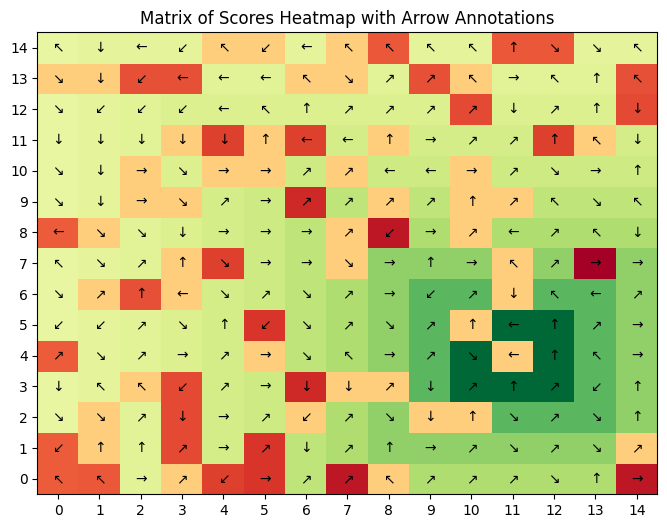

In [57]:


import numpy as np
import matplotlib.pyplot as plt

arrow_dictionary = {
    0 : "\u2191",
    1 : "\u2192",
    2 : "\u2193",
    3 : "\u2190",
    4 : "\u2197",
    5 : "\u2198",
    6 : "\u2199",
    7 : "\u2196",
}

# Replace these with your actual matrices and alphanumeric arrow values
matrix_of_scores = score_matrix
arrows_list = []

# Fill with all the right movements from print_rule(best_rule)
for i in range(15):
    for j in range(15):
        arrows_list.append(arrow_dictionary[best_rule.rules_grid[i][j]])

print(arrows_list)

# Define color map
cmap = plt.cm.RdYlGn  # Red-Yellow-Green colormap

# Plotting the heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.pcolor(matrix_of_scores, cmap=cmap)

# Adding arrow annotations starting from the top left so in reverse order
for i in range(15):
    for j in range(15,):
        #FIXME
        plt.annotate(arrows_list[i*15 + j], xy=(i + 0.5, j + 0.5), ha='center', va='center', color='black')

plt.title("Matrix of Scores Heatmap with Arrow Annotations")

# row and col
plt.xticks(np.arange(0.5, 15.5, 1), np.arange(0, 15, 1))
plt.yticks(np.arange(0.5, 15.5, 1), np.arange(0, 15, 1))


# Display the plot
plt.show()


## Working colormap

In [60]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(matrix_of_scores)

#adjust the size of the figure
fig.set_size_inches(12, 7)

ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

# Add the arrows inside the heatmap
for i in range(15):
    for j in range(15):
        #FIXME
        ax.annotate(arrows_list[i+ j], xy=(i, j), ha='center', va='center', color='black')

In [12]:
from rules_new import *

In [13]:
## Apply the rule to the env (env.step) until the goal is reached

print("Goal position:", goal_position)

while agent_position != goal_position:
    
    print("Agent position:", agent_position)
    
    x, y = agent_position

    if(good_movement((x, y), best_rule.get_movement(x, y))):    

        current_move = best_rule.get_movement(x, y)
        env.step(current_move)
        agent_position = (agent_position[0] + int_to_coord[current_move][0], 
                        agent_position[1] + int_to_coord[current_move][1])
    else:
        print("WARNING: bad movement")
        break

    if agent_position == goal_position:
        print("Goal reached!")
        break

    env.render()



Goal position: (7, 43)
Agent position: (8, 8)

                                                                                
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...........>...                                 
                                ...............                                 
                                ...............                                 
                                ...............               

RuntimeError: Called step on finished NetHack